# Heart Disease Prediction

### 1. Introduction

#### Objective:

This classification model will predict whether the patient has heart disease or not based on various conditions/symptoms of their body.

#### Data Description:

The dataset contains 13 independent features and 1 target feature as described below.

1. age
2. sex
3. cp (chest pain type) (4 values)
4. trestbps (resting blood pressure)
5. chol (serum cholestoral in mg/dl)
6. fbs (fasting blood sugar) > 120 mg/dl
7. restecg (resting electrocardiographic results) (values 0,1,2)
8. thalach (maximum heart rate achieved)
9. exang (exercise induced angina)
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. ca - number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target - is the binary target variable, 0 indicates that the patient has heart disease, the value is 1 if not.

### 2. Exploratory Data Analysis (EDA)

#### 2.1 Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
import os
import warnings

from operator import add

MEDIUM_SIZE = 10
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

%matplotlib inline
warnings.filterwarnings('ignore')

#### 2.2 Import Dataset

In [5]:
df = pd.read_csv('./data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
print(f'Dataset contains {df.shape[0]} samples, {df.shape[1] - 1} independent features 1 target continuous variable.')

Dataset contains 303 samples, 13 independent features 1 target continuous variable.


### 2.3 Basic Analysis

In [7]:
print(df.info())

missing_values = (df.isnull().sum() / len(df)) * 100
print("\nFeatures with missing values: \n", missing_values[missing_values > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

Features with missing values: 
 Series([], dtype: float64)


* All the independent features in the dataset are numeric.
* The target variable is numeric.
* There is no feature with missing values.

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


* No outliers seen in the data.

In [9]:
print(np.char.center(" Unique values of categorical variables ", 60, fillchar = "*"))
print("\nSex: ", df.sex.unique())
print("Cp: ", sorted(df.cp.unique()))
print("fbs: ", sorted(df.fbs.unique()))
print("restecg: ", sorted(df.restecg.unique()))
print("exang: ", sorted(df.exang.unique()))
print("slope: ", sorted(df.slope.unique()))
print("ca: ", sorted(df.ca.unique()))
print("thal: ", sorted(df.thal.unique()))
print("target: ", sorted(df.target.unique()))

********** Unique values of categorical variables **********

Sex:  [1 0]
Cp:  [0, 1, 2, 3]
fbs:  [0, 1]
restecg:  [0, 1, 2]
exang:  [0, 1]
slope:  [0, 1, 2]
ca:  [0, 1, 2, 3, 4]
thal:  [0, 1, 2, 3]
target:  [0, 1]


* Sex is a nominal variable. 1 - Male, 0 - Famale
* Cp - Chest pain type is a nominal variable, unique values are 0, 1, 2 and 3
* fbs - fasting blood sugar is a binary variable. Value is 1 f (fasting blood sugar) > 120 mg/dl, otherwise 0
* restecg - resting electrocardiographic results - is a nominal variable, unique values are 0, 1 and 2
* exang - exercise induced angina is a binary variable, Value is 1 is induced, 0 if not
* slope - the slope of the peak exercise ST segment is a nominal variable, unique values are 0, 1 and 2
* ca - number of major vessels (0-3) colored by flourosopy is an ordinal variable, values are 0, 1, 2, 3 and 4
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect is an nominal variable, values are 0, 1, 2 and 3

### 2.4 Detailed Analysis

In [10]:
def draw_semi_pie_chart(data, column, fig, renamed_index_dict, title):
    default_colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666']
    rnd.shuffle(default_colors)
    ax = df[column].value_counts().rename(index = renamed_index_dict).plot.pie(colors = default_colors, autopct='%1.1f%%', startangle=90, title = title)
    ax.set_ylabel('')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20)
        
    centre_circle = plt.Circle((0,0), 0.70, fc='white')
    fig.gca().add_artist(centre_circle)

##### Categorical Feature Value Ratio

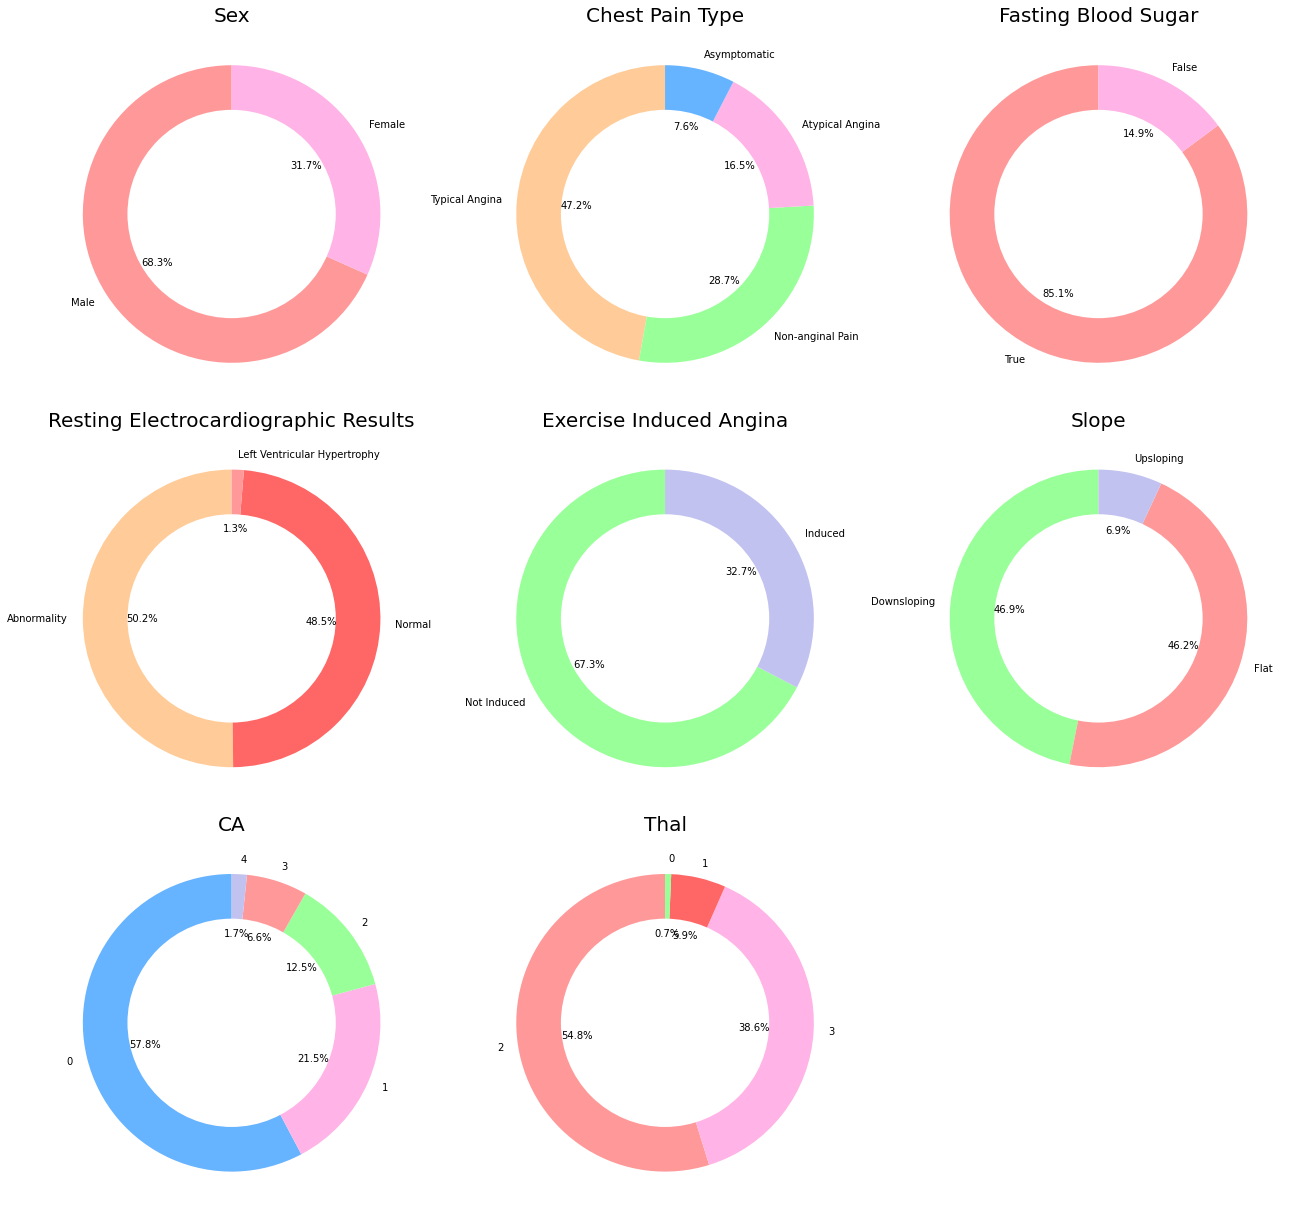

In [11]:
fig = plt.gcf()
fig.set_size_inches(18, 17)
grid_rows = 3
grid_cols = 3

# Draw Sex Pie chart
plt.subplot(grid_rows, grid_cols, 1)
draw_semi_pie_chart(df, 'sex', fig, {0: 'Female', 1: 'Male'}, 'Sex')

# Draw Chest pain type chart
plt.subplot(grid_rows, grid_cols, 2)
draw_semi_pie_chart(df, 'cp', fig, {0:'Typical Angina', 1:'Atypical Angina', 2:'Non-anginal Pain',3:'Asymptomatic'}, 'Chest Pain Type')

# Draw Fasting blood sugar chart
plt.subplot(grid_rows, grid_cols, 3)
draw_semi_pie_chart(df, 'fbs', fig, {0:'True', 1:'False'}, 'Fasting Blood Sugar')

# Draw restecg - resting electrocardiographic results
plt.subplot(grid_rows, grid_cols, 4)
draw_semi_pie_chart(df, 'restecg', fig, {0:'Normal', 1:'Abnormality', 2:'Left Ventricular Hypertrophy'}, 'Resting Electrocardiographic Results')

# Draw exang - exercise induced angina
plt.subplot(grid_rows, grid_cols, 5)
draw_semi_pie_chart(df, 'exang', fig, {0:'Not Induced', 1:'Induced'}, 'Exercise Induced Angina')

# Draw exang - exercise induced angina
plt.subplot(grid_rows, grid_cols, 6)
draw_semi_pie_chart(df, 'slope', fig, {0:'Upsloping', 1:'Flat', 2:'Downsloping'}, 'Slope')

# Draw ca
plt.subplot(grid_rows, grid_cols, 7)
draw_semi_pie_chart(df, 'ca', fig, {0:'0', 1:'1', 2:'2', 3:'3', 4:'4'}, 'CA')

# Draw thal
plt.subplot(grid_rows, grid_cols, 8)
draw_semi_pie_chart(df, 'thal', fig, {0:'0', 1:'1', 2:'2', 3:'3'}, 'Thal')

fig.tight_layout()
plt.show()

* Categorical features are not well balanced in the dataset.
* Dataset contains more male patients than female.
* Typical Angina and Non-Anginal is the common Chest pain type.
* Most of the patients has Fasting Blood Sugar > 120 mg/dl.
* Left Ventricular Hypertrophy is observed least in Resting Electrocardiographics Results.
* Excersize didn't induce Angina for more than 60%+ patients.
* Unslopping is least observed in the Slope.
* Least type of CA is 4 and most type is 0
* Least type of Thal is 0 and most type is 2

In [14]:
def create_percent_stacked_barchart(data, title = None, ylabel = None, xlabel = None):
    default_colors = ['#019600', '#3C5F5A', '#219AD8']
    
    # From raw value to percentage
    totals = data.sum(axis=1)
    bars = ((data.T / totals) * 100).T
    r = list(range(data.index.size))

    # Plot
    barWidth = 0.95
    names = data.index.tolist()
    bottom = [0] * bars.shape[0]
    
    # Create bars
    color_index = 0
    plots = []
    for bar in bars.columns:
        plots.append(plt.bar(r, bars[bar], bottom=bottom, color=default_colors[color_index], edgecolor='white', width=barWidth))
        bottom = list(map(add, bottom, bars[bar]))
        color_index = 0 if color_index >= len(default_colors) else color_index + 1

    # Custom x axis
    plt.title(title)
    plt.xticks(r, names)
    plt.xlabel(data.index.name if xlabel is None else xlabel)
    plt.ylabel(data.columns.name if ylabel is None else ylabel)
    ax = plt.gca()
        
    y_labels = ax.get_yticks()
    ax.set_yticklabels([str(y) + '%' for y in y_labels])

    flat_list = [item for sublist in data.T.values for item in sublist]
    for i, d in zip(ax.patches, flat_list):
        data_label = str(d) + " (" + str(round(i.get_height(), 2)) + "%)"
        ax.text(i.get_x() + 0.45, i.get_y() + 5, data_label, horizontalalignment='center', verticalalignment='center', fontdict = dict(color = 'white', size = 20))

    for item in ([ax.title]):
        item.set_fontsize(27)
        
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(24)
    
    legend = ax.legend(plots, bars.columns.tolist(), fancybox=True)
    plt.setp(legend.get_texts(), fontsize='20')

##### Categorical Feature Value Ratio against Target

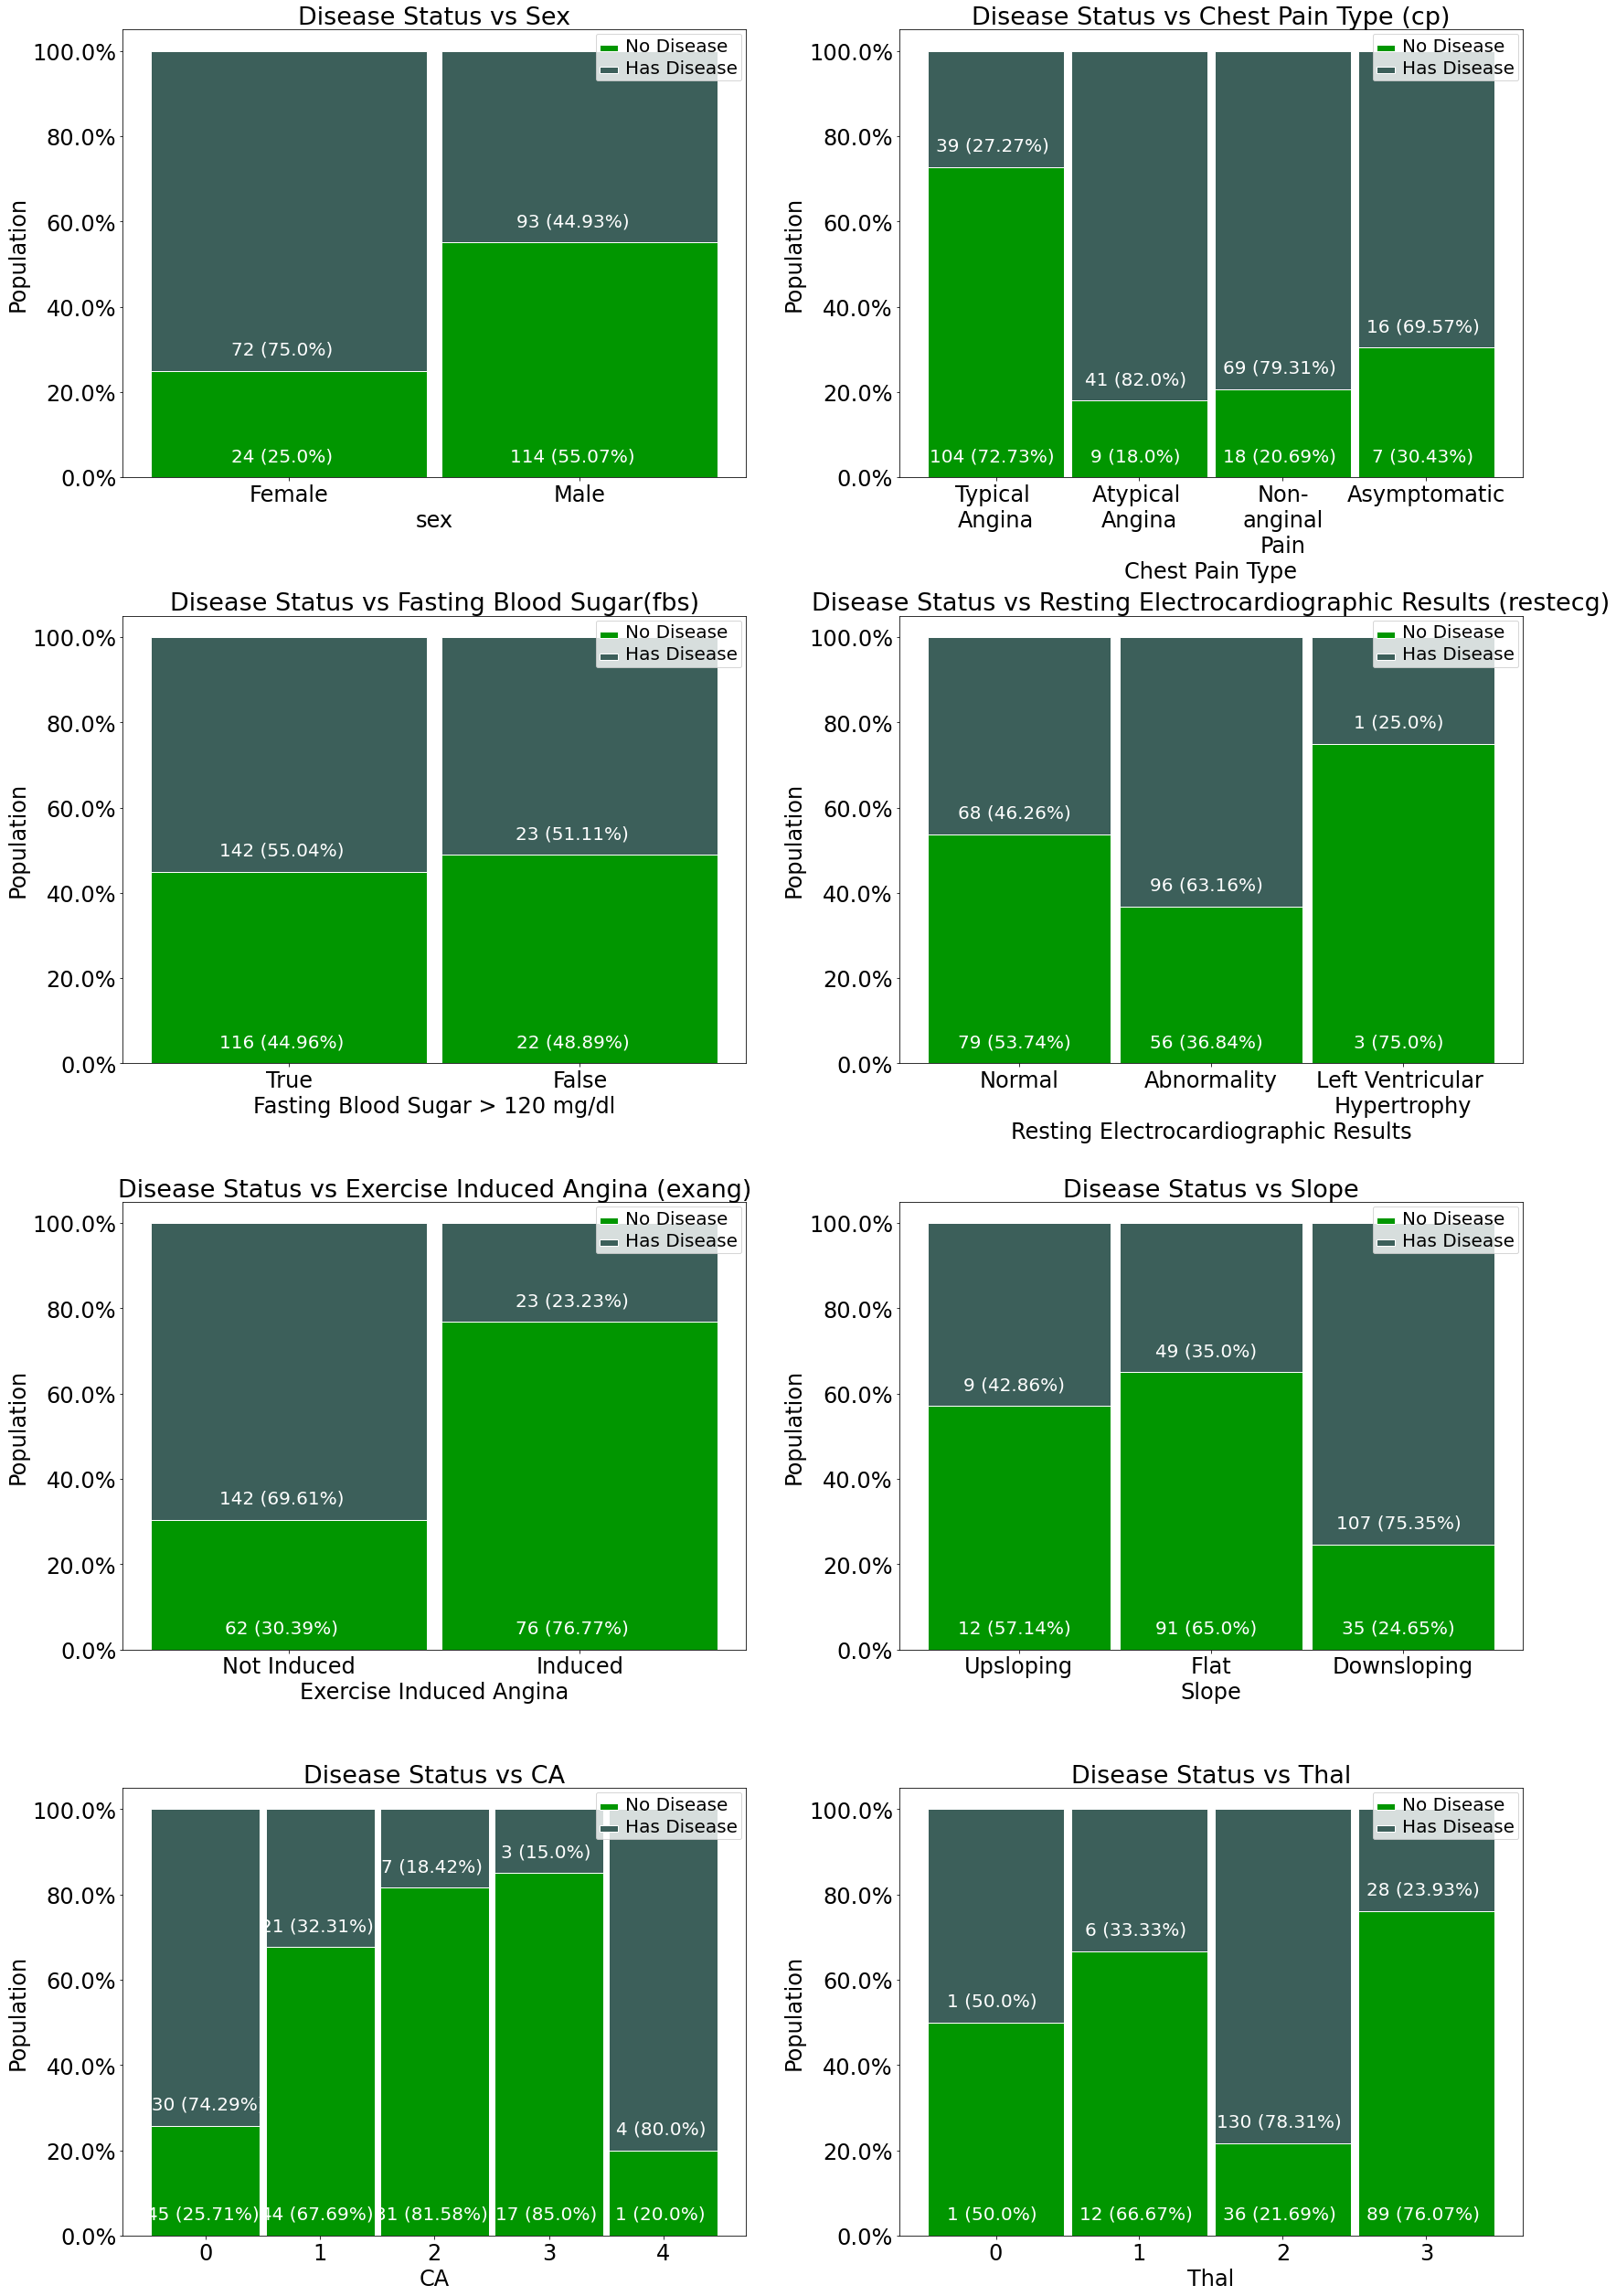

In [15]:
fig = plt.gcf()
fig.set_size_inches(25, 35)
grid_rows = 4
grid_cols = 2


# Draw Disease Status vs Sex chart
plt.subplot(grid_rows, grid_cols, 1)
temp = df[['sex','target']].groupby(['sex','target']).size().unstack('target')
temp.rename(index={0:'Female', 1:'Male'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Sex', ylabel = 'Population')


# Draw Disease Status vs Chest pain type chart
plt.subplot(grid_rows, grid_cols, 2)
temp = df[['cp','target']].groupby(['cp','target']).size().unstack('target')
temp.rename(index={0:'Typical \nAngina', 1:'Atypical \nAngina', 2:'Non-\nanginal\nPain',3:'Asymptomatic'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Chest Pain Type (cp)', ylabel = 'Population', xlabel = 'Chest Pain Type')


# Draw fbs - fasting blood sugar chart
plt.subplot(grid_rows, grid_cols, 3)
temp = df[['fbs','target']].groupby(['fbs','target']).size().unstack('target')
temp.rename(index={0:'True', 1:'False'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Fasting Blood Sugar(fbs)', ylabel = 'Population', xlabel = 'Fasting Blood Sugar > 120 mg/dl')


# Draw restecg - resting electrocardiographic results chart
plt.subplot(grid_rows, grid_cols, 4)
temp = df[['restecg','target']].groupby(['restecg','target']).size().unstack('target')
temp.rename(index={0:'Normal', 1:'Abnormality', 2:'Left Ventricular \nHypertrophy'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Resting Electrocardiographic Results (restecg)', ylabel = 'Population', xlabel = 'Resting Electrocardiographic Results')


# Draw exang - exercise induced angina chart
plt.subplot(grid_rows, grid_cols, 5)
temp = df[['exang','target']].groupby(['exang','target']).size().unstack('target')
temp.rename(index={0:'Not Induced', 1:'Induced'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Exercise Induced Angina (exang)', ylabel = 'Population', xlabel = 'Exercise Induced Angina')


# Draw slope - the slope of the peak exercise ST segment chart
plt.subplot(grid_rows, grid_cols, 6)
temp = df[['slope','target']].groupby(['slope','target']).size().unstack('target')
temp.rename(index={0:'Upsloping', 1:'Flat', 2:'Downsloping'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Slope', ylabel = 'Population', xlabel = 'Slope')


# Draw ca - number of major vessels (0-3) colored by flourosopy chart
plt.subplot(grid_rows, grid_cols, 7)
temp = df[['ca','target']].groupby(['ca','target']).size().unstack('target')
temp.rename(columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs CA', ylabel = 'Population', xlabel = 'CA')


# Draw thal chart
plt.subplot(grid_rows, grid_cols, 8)
temp = df[['thal','target']].groupby(['thal','target']).size().unstack('target')
temp.rename(columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Thal', ylabel = 'Population', xlabel = 'Thal')

fig.tight_layout()
plt.show()

* The feature 'sex' is biased in the sample. Hence saying 'most of the Females are tend to have heart disease' is **untrue**.
* Pain with chest pain types Atypical Angina, Non-Anginal Pain, Asymptomatic more likely to have heart disease.

##### Correlation Heat Map

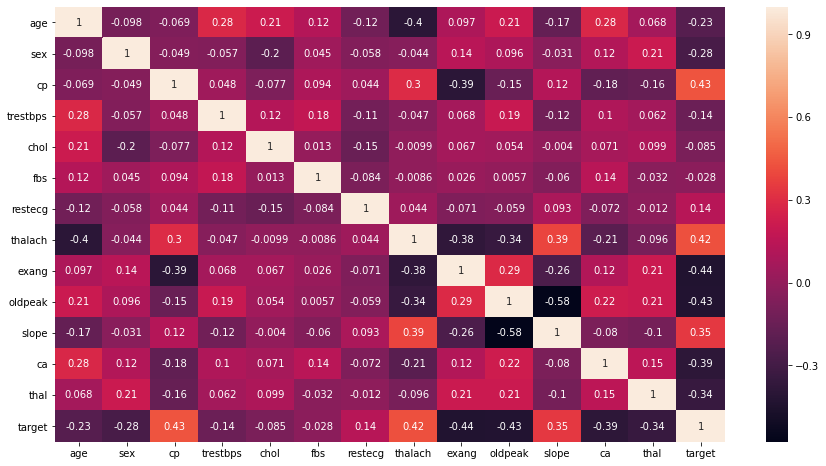

In [16]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.heatmap(df.corr(), annot = True)
plt.show()

* There is no features with more than 0.5 correlation. 

##### Distributions

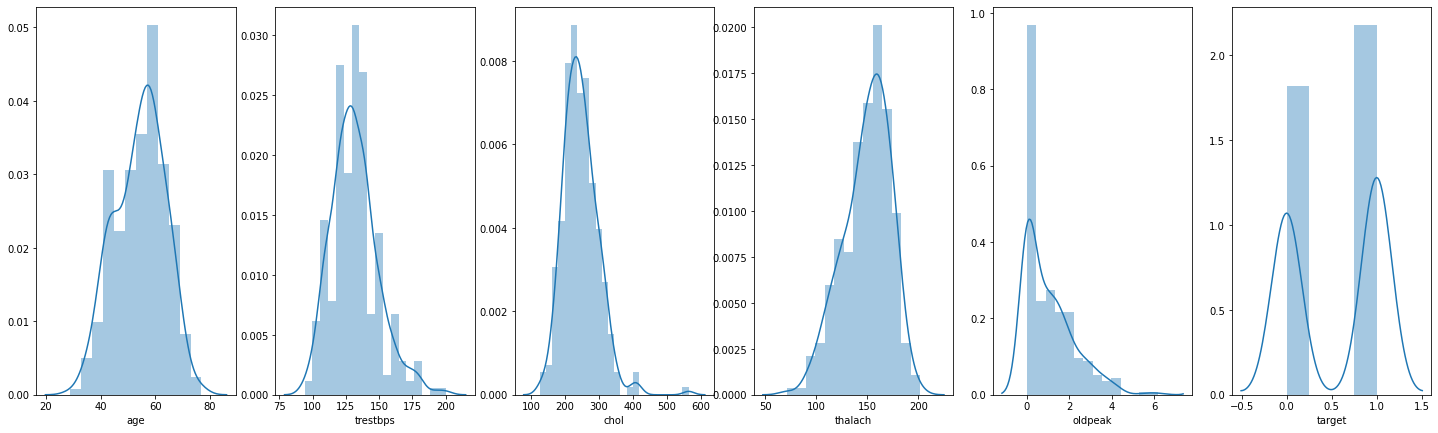

In [28]:
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
number_of_columns = len(continuous_features)
number_of_rows = 5
plt.figure(figsize=(25, 50))

for i, f in enumerate(continuous_features):
    plt.subplot(number_of_rows + 1, number_of_columns, i + 1)
    sns.distplot(df[f], kde=True)

* The features Age, trestbps, chol, thalach are normally distributed.
* The likelihood of getting heart disease of more for the people with age 50 - 60.
* The target variable is balanced.

##### Pair Plots

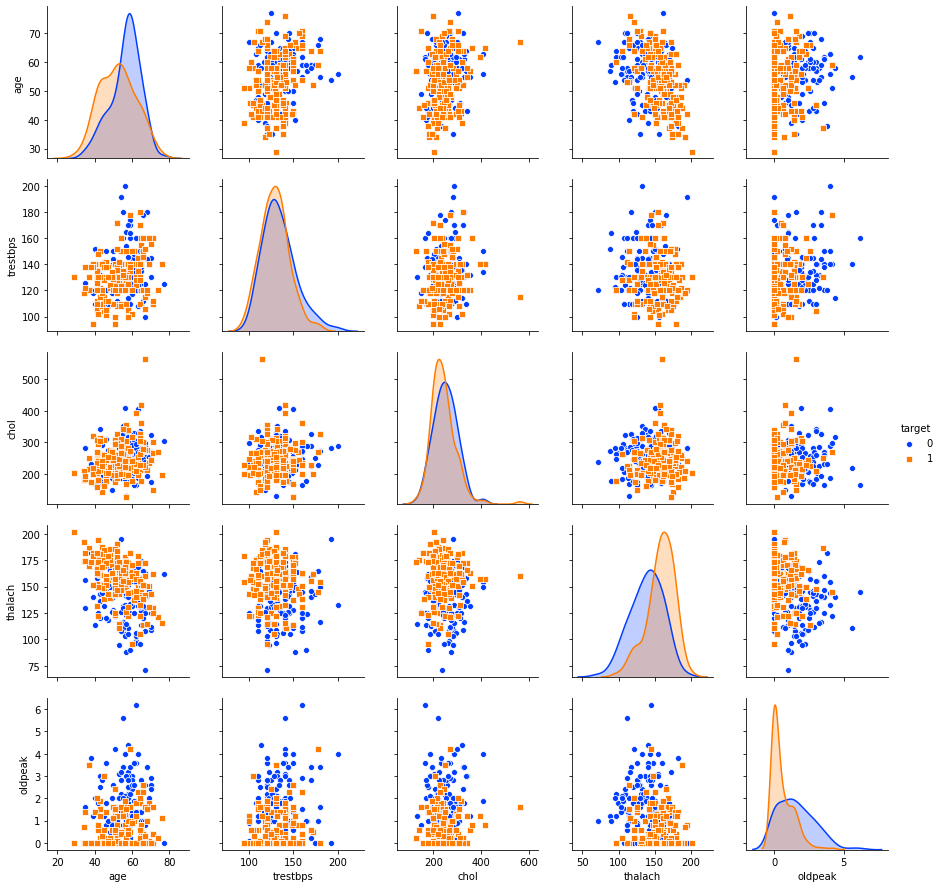

In [29]:
sns.pairplot(df, 
             hue = 'target', 
             markers=["o", "s"], 
             vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], 
             palette = sns.color_palette("bright", 10))

There is no feature pair that well seperates the data. 

### 3. Data Pre Processing

#### 3.1 Extract Independent and Target Variables

* Here the independet features will be extracted along with OneHotEncoding will be done to the nominal features cp, slope, thal and restecg.
* The parameter **drop_first = True** as been set in order to avoid dummy variable trap after One hot encoding

In [30]:
nominal_features = ['cp', 'slope', 'thal', 'restecg']
x = pd.get_dummies(df.drop(['target'], axis = 1), columns = nominal_features, drop_first=True).values
y = df.target.values

#### 3.2 Split the Data into Train and Test set

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#### 3.3 Feature Scalling

In [35]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### 4. Dimensionality Reduction

Linear Discriminant Analysis (LDA) will be used as dimensionality reduction technique for this dataset since it's a classification problem.

In [36]:
print("Shape of X before Dimensionlity Reduction: ", x_train.shape)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

print("Shape of X after Dimensionlity Reduction: ", x_train.shape)

Shape of X before Dimensionlity Reduction:  (242, 19)
Shape of X after Dimensionlity Reduction:  (242, 1)


### 5. Build and Train the Model

#### 5.1 Train the Model with Training Set

Support Vector Machine Classifier and K-Nearest Neighbors have been used to compare the model performance.

In [37]:
# SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)
y_pred_svm = classifier.predict(x_test)

# KNN
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier()
classifier_knn.fit(x_train, y_train)
y_pred_knn = classifier_knn.predict(x_test)

### 6. Model Evaluation

#### 6.1 Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix

print("SVM Confusion Matrix")
cm = confusion_matrix(y_test, y_pred_svm)
print(cm)

print("KNN Confusion Matrix")
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

SVM Confusion Matrix
[[21  6]
 [ 3 31]]
KNN Confusion Matrix
[[22  5]
 [ 5 29]]


* KNN predicts more false negative than SVM.

#### 6.2 K-Fold Cross Validation

Ten fold cross validation will be performed.

In [42]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, x_train, y_train, cv = 10)

print("Scores: ", scores)
print("Accuracy: ", round(scores.mean(), 2) * 100, "%")
print("Standard Deviation: +/-", scores.std())

Scores:  [0.76       0.88       0.875      0.83333333 0.95833333 0.83333333
 0.91666667 0.83333333 0.79166667 0.91666667]
Accuracy:  86.0 %
Standard Deviation: +/- 0.05789573962448936


### 7. Model Optimization using Grid Search Technique

Grid search is used to find the best hyperparameter for the model.

#### Grid Search on SVM

In [44]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Score: ", best_accuracy)
print("Best Params: ", best_parameters)

Best Score:  0.8598333333333334
Best Params:  {'C': 1, 'kernel': 'linear'}


#### Grid Search on KNN

In [45]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = classifier_knn, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Score: ", best_accuracy)
print("Best Params: ", best_parameters)

Best Score:  0.8638333333333333
Best Params:  {'n_neighbors': 5}


KNN predicts slight more accurate than SVM, hence KNN will be chosen as the best model.

##### Area Under the Curve (AUC) for SVM

AUC: 0.914


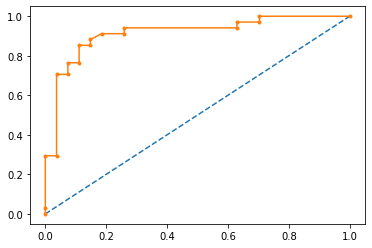

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', C = 1, random_state = 0, probability = True)
classifier.fit(x_train, y_train)
probs = classifier.predict_proba(x_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### 8. Conclussion

* Linear SVM with C = 1, will be chosen as the best model for this problem.
* The best accuracy has been obtained as 91.4%